# Data Privacy Sharing - Practical Algorithms
## Contents
1. (T3) Digital Watermarking
2. (T5) Email Data Leakage Prevention - Example using regular expression filtering
3. (T7) Hashing with salt
4. (T8) Tokenization
5. (T9) Field level encryption - Example using Symmetric Key Encryption
6. (T13) Data File Integrity Verification - Example using Asymmetric Key Encryption
7. Format preserving encryption
8. Synthetic data generation

## (T3) Digital Watermarking

A digital watermark is a kind of marker covertly embedded in a noise-tolerant signal such as audio, video or image data. It is typically used to identify ownership of the copyright of such signal. 

"Watermarking" is the process of hiding digital information in a carrier signal; the hidden information should, but does not need to, contain a relation to the carrier signal. Digital watermarks may be used to verify the authenticity or integrity of the carrier signal or to show the identity of its owners. It is prominently used for tracing copyright infringements and for banknote authentication.


<h4><left>Traditional Watermark</left></h4>
<img src="watermark.jpeg" alt="Drawing" style="width: 400px; float:left"/>


Unlike traditional watermarking which makes the watermark obvious for all viewers, digital watermarking is usually hidden from plain view and can only be accessed by a certain algorithm to extract the watermark data.


One of the methods of digital watermarking is **steganography**, which is the practice of concealing a file, message, image, or video within another file, message, image, or video.

### Steganography

Simple steganography works by storing the hidden information in the data that does not significantly change how the original file looks.

Some of the simple steganographic methods are:
- **Text Data**:
    - White space manipulation: adding of white spaces before a newline character to encode hidden information
- **Numeric Data**:
    - Least significant decimal: altering least significant decimal places to store hidden information
- **Image Data**:
    - Least significant bits: altering the least significant bits of each pixel to store hidden information

#### Steganography - Text in text using white space manipulation

In this example, we encode our secret message into white spaces and then hide it after the first paragraph 


In [1]:
# package for encoding text into spaces and tabs
import codext

# open lorem ipsum file
with open('lorem_ipsum.txt') as f:
    document_text = f.read()

print('Text from file:\n')    
print(document_text)


Text from file:

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Pellentesque dignissim enim sit amet. Quam adipiscing vitae proin sagittis nisl rhoncus mattis. Arcu risus quis varius quam quisque id diam vel quam. Turpis cursus in hac habitasse. Sodales ut etiam sit amet. Est velit egestas dui id ornare arcu odio ut. Volutpat maecenas volutpat blandit aliquam etiam erat velit scelerisque in. Magna sit amet purus gravida quis blandit turpis cursus. Sit amet massa vitae tortor.

Nisl tincidunt eget nullam non nisi. Amet consectetur adipiscing elit ut. Mauris nunc congue nisi vitae suscipit. Ullamcorper morbi tincidunt ornare massa eget egestas. Mauris nunc congue nisi vitae suscipit tellus mauris a diam. Tortor at risus viverra adipiscing at in tellus integer feugiat. Mauris ultrices eros in cursus turpis massa tincidunt dui ut. Dui vivamus arcu felis bibendum ut tristique et egestas. Eget aliquet nibh praesent 

## Exercise

1. Create a variable called **secret_message** and initialize with your secret message string.

2. Encode the secret message using the **codext.encode()** function

Example code

```
codext.encode( text_string, 'whitespace')

```

3. Print the encoded message to verify that it has been encoded

In [2]:
##################
# YOUR CODE HERE #
##################

## 1. Create a variable called secret_message and initialize with your secret message string.

secret_message = '<type your secret message here>' #edit here

## 2. Encode the secret message using the codext.encode() function

## EXAMPLE CODE
##
## encoded_string = codext.encode( text_string, 'whitespace')

encoded_secret_message = <your code here> #edit here

## 3. Print the encoded message to verify that it has been encoded

print(<your code here>) #edit here

In [3]:
def hide_text_in_text(cover_text:str, hidden_text:str) -> str:
    """Hides hidden_text in cover_text using white space manipulation steganography. 
    Hidden text is placed at the end of the first paragraph
    
    Args:
        cover_text: Text to be shown to public
        hidden_text: Text to be hidden from public
    Return:
        hidden_text mixed into the cover text
    """
    
    first_newline_position = min(len(cover_text), cover_text.find('\n'))
    
    encoded_hidden_text = codext.encode(hidden_text, 'whitespace')
    
    return cover_text[:first_newline_position]+ encoded_hidden_text + cover_text[first_newline_position:]

def extract_text_in_text(mixed_text:str) -> str:
    """Extract hidden_text from cover_text using white space manipulation steganography
    
    Args:
        mixed_text: Text mixed with hidden text
        
    Return:
        decoded hidden text
    """
    
    first_newline_position = min(len(mixed_text), mixed_text.find('\n'))
    
    hidden_text_start_position = len(mixed_text[:first_newline_position].rstrip())
    
    encoded_hidden_text = mixed_text[hidden_text_start_position:first_newline_position]
    
    
    return codext.decode(encoded_hidden_text, 'whitespace')

In [4]:
mixed = hide_text_in_text(document_text, secret_message)

print(mixed)

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Pellentesque dignissim enim sit amet. Quam adipiscing vitae proin sagittis nisl rhoncus mattis. Arcu risus quis varius quam quisque id diam vel quam. Turpis cursus in hac habitasse. Sodales ut etiam sit amet. Est velit egestas dui id ornare arcu odio ut. Volutpat maecenas volutpat blandit aliquam etiam erat velit scelerisque in. Magna sit amet purus gravida quis blandit turpis cursus. Sit amet massa vitae tortor.	 	 	 			  	 				  	 		 	   		  		 						  	 		 	   		  		 						  				 		 						   		  	  		 	 	  			  	   		 		  		 	 	   	 				 				 

Nisl tincidunt eget nullam non nisi. Amet consectetur adipiscing elit ut. Mauris nunc congue nisi vitae suscipit. Ullamcorper morbi tincidunt ornare massa eget egestas. Mauris nunc congue nisi vitae suscipit tellus mauris a diam. Tortor at risus viverra adipiscing at in tellus integer feugiat. Mauris ultrices eros in cur

In [5]:
print(extract_text_in_text(mixed))

This is a secret!


#### Steganography - Image in image using least significant bits algorithm

e.g. in the pixel 8-bit value 10110011 (of one of the RGB colors), the first 4 bits 1011 are the most significant bits, while the last 4 bits 0011 are the least significant bits. We can store hidden information in the last 4 bits while not compromizing too much of how the overall image looks

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io


def decimalToBinary(decimal_number:int) -> str: 
    """Translate decimal to binary to see bit representation in str
    
    Args:
        decimal_number: integer represented in decimal numeric system
        
    Returns:
        decimal_number represented in binary numeric system as a string data type
    
    """
    return bin(decimal_number).replace("0b", "")


def binaryToDecimal(binary_string:str) -> int: 
    """Translate binary back to decimal
    
    Args:
        binary_string: string of binary bits
    
    Returns:
        decimal representation of binary bits in integer data type
    """
    return int(binary_string, 2)


8-bit RGB color codes are usually represented in a group of 3 decimal integers (with range 0-255), for example the color Red is represented as (255, 0, 0) in decimal integer representation or (11111111, 00000000, 00000000) in binary bit representation.

Let's do a simple decimal to binary conversion to see how the decimal values look like in bits.

In [7]:
print('{} in binary is {}'.format(255, decimalToBinary(255)))
print('{} in decimal is {}'.format('11111111', binaryToDecimal('11111111')))

255 in binary is 11111111
11111111 in decimal is 255


## Exercise

1. take only the most significant bits of 255 (i.e. 11110000) and convert into decimal and print it out.

2. take only the least significant bits of 255 (i.e. 00001111) and convert into decimal and print it out.




In [8]:
#############
# CODE HERE #
#############

## 1. take only the most significant bits of 255 (i.e. 11110000) and convert into decimal and print it out.

bit_string = '<type the most significant bits here>' ## Edit here

print('{} in decimal is {}'.format(bit_string, binaryToDecimal(bit_string)))

## 2. take only the least significant bits of 255 (i.e. 00001111) and convert into decimal and print it out.

bit_string = '<type the most significant bits here>' ## Edit here

print('{} in decimal is {}'.format(bit_string, binaryToDecimal(bit_string)))

11110000 in decimal is 240
00001111 in decimal is 15


Let's create a palette for quick access to colors to create a random bitmap image to see the effects of showing only the most significant bits and least significant bits.

We also create a palette each for the most significant bits and least significant bits version of the palette

In [9]:
# create palette for quick access to colors 
palette = np.array([[255,   0,   0], # index 0: red
                    [  0, 255,   0], # index 1: green
                    [  0,   0, 255], # index 2: blue
                    [255, 255, 255], # index 3: white
                    [  0,   0,   0], # index 4: black
                    [255, 255,   0], # index 5: yellow
                   ], dtype=np.uint8)

significant_bits_palette = (palette /255 * 240).astype(int)

non_significant_bits_palette = (palette /255 * 15).astype(int)

print('Palette:')
print(palette)
print('Most significant bits palette:')
print(significant_bits_palette)
print('Least significant bits palette:')
print(non_significant_bits_palette)

Palette:
[[255   0   0]
 [  0 255   0]
 [  0   0 255]
 [255 255 255]
 [  0   0   0]
 [255 255   0]]
Most significant bits palette:
[[240   0   0]
 [  0 240   0]
 [  0   0 240]
 [240 240 240]
 [  0   0   0]
 [240 240   0]]
Least significant bits palette:
[[15  0  0]
 [ 0 15  0]
 [ 0  0 15]
 [15 15 15]
 [ 0  0  0]
 [15 15  0]]


In [10]:
# generate random array of colors using palette

m, n = 4, 6

indices = np.random.randint(0, len(palette), size=(m, n))

indices

array([[2, 4, 0, 1, 3, 4],
       [1, 1, 1, 1, 2, 4],
       [3, 5, 3, 0, 0, 0],
       [3, 3, 0, 2, 1, 3]])

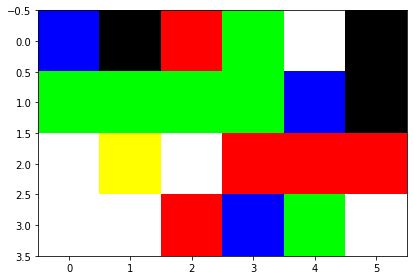

In [11]:
# plot original color palette
io.imshow(palette[indices])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


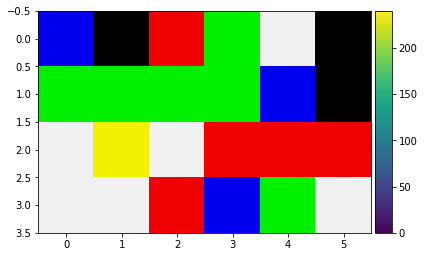

In [12]:
# plot significant bits only
io.imshow(significant_bits_palette[indices])

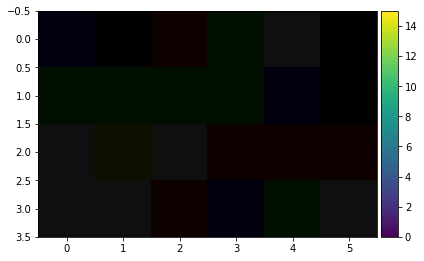

In [13]:
# plot non significant bits only
io.imshow(non_significant_bits_palette[indices])

### Testing out with real image file

Now we try to perform the steganography on real photos.

Steganography class obtained from https://github.com/kelvins/steganography

In [14]:
# PIL: Python Imaging Library
from PIL import Image

from typing import Tuple

class Steganography(object):
    @staticmethod
    def __int_to_bin(rgb: Tuple[int,int,int]) -> Tuple[str,str,str]:
        """Convert an integer tuple to a binary (string) tuple.
        
        Args: 
            rgb: An integer tuple (e.g. (220, 110, 96))
        Return: 
            A string tuple (e.g. ("00101010", "11101011", "00010110"))
        """
        r, g, b = rgb
        return ('{0:08b}'.format(r),
                '{0:08b}'.format(g),
                '{0:08b}'.format(b))

    @staticmethod
    def __bin_to_int(rgb: Tuple[str,str,str]) -> Tuple[int,int,int]:
        """Convert a binary (string) tuple to an integer tuple.
        Args:
            rgb: A string tuple (e.g. ("00101010", "11101011", "00010110"))
        Return: 
            Return an int tuple (e.g. (220, 110, 96))
        """
        r, g, b = rgb
        return (int(r, 2),
                int(g, 2),
                int(b, 2))

    @staticmethod
    def __merge_rgb(rgb1: Tuple[str,str,str], rgb2: Tuple[str,str,str]) -> Tuple[str,str,str]:
        """Merge two RGB tuples.
        
        Args:
            rgb1: A string tuple (e.g. ("00101010", "11101011", "00010110"))
            rgb2: Another string tuple (e.g. ("00101010", "11101011", "00010110"))
        Return: An integer tuple with the two RGB values merged.
        """
        r1, g1, b1 = rgb1
        r2, g2, b2 = rgb2
        rgb = (r1[:4] + r2[:4],
               g1[:4] + g2[:4],
               b1[:4] + b2[:4])
        return rgb

    @staticmethod
    def merge(img1: Image, img2: Image) -> Image:
        """Merge two images. The second one will be merged into the first one.
        
        Args:
            img1: First image
            img2: Second image
        Return: A new merged image.
        """

        # Check the images dimensions
        if img2.size[0] > img1.size[0] or img2.size[1] > img1.size[1]:
            raise ValueError('Image 2 should not be larger than Image 1!')

        # Get the pixel map of the two images
        pixel_map1 = img1.load()
        pixel_map2 = img2.load()

        # Create a new image that will be outputted
        new_image = Image.new(img1.mode, img1.size)
        pixels_new = new_image.load()

        for i in range(img1.size[0]):
            for j in range(img1.size[1]):
                rgb1 = Steganography.__int_to_bin(pixel_map1[i, j])

                # Use a black pixel as default
                rgb2 = Steganography.__int_to_bin((0, 0, 0))

                # Check if the pixel map position is valid for the second image
                if i < img2.size[0] and j < img2.size[1]:
                    rgb2 = Steganography.__int_to_bin(pixel_map2[i, j])

                # Merge the two pixels and convert it to a integer tuple
                rgb = Steganography.__merge_rgb(rgb1, rgb2)

                pixels_new[i, j] = Steganography.__bin_to_int(rgb)

        return new_image

    @staticmethod
    def unmerge(img: Image) -> Image:
        """Unmerge an image.
        
        Args:
            img: The input image.
        Return: The unmerged/extracted image.
        """

        # Load the pixel map
        pixel_map = img.load()

        # Create the new image and load the pixel map
        new_image = Image.new(img.mode, img.size)
        pixels_new = new_image.load()

        # Tuple used to store the image original size
        original_size = img.size

        for i in range(img.size[0]):
            for j in range(img.size[1]):
                # Get the RGB (as a string tuple) from the current pixel
                r, g, b = Steganography.__int_to_bin(pixel_map[i, j])

                # Extract the last 4 bits (corresponding to the hidden image)
                # Concatenate 4 zero bits because we are working with 8 bit
                rgb = (r[4:] + '0000',
                       g[4:] + '0000',
                       b[4:] + '0000')

                # Convert it to an integer tuple
                pixels_new[i, j] = Steganography.__bin_to_int(rgb)

                # If this is a 'valid' position, store it
                # as the last valid position
                if pixels_new[i, j] != (0, 0, 0):
                    original_size = (i + 1, j + 1)

        # Crop the image based on the 'valid' pixels
        new_image = new_image.crop((0, 0, original_size[0], original_size[1]))

        return new_image

<h4><center>Original image (doge.jpg)</center></h4>

![Original image](doge.jpg)

<h4><center>Hidden image (nyancat.jpeg)</center></h4>

![Hidden image](nyancat.jpeg)

In [15]:
merged_image = Steganography.merge(Image.open('doge.jpg'), Image.open('nyancat.jpeg'))
merged_image.save('merged.jpg')

<h4><center>Merged image</center></h4>

![merged image](merged.jpg)

## (T5) Email Data Leakage Prevention - Example using regular expression filtering

Data Leak Prevention (DLP) is a feature that prevents certain information to leave the organization via email. What information this is, is defined in the configuration of the DLP system. Typically, it includes credit card numbers, bank account numbers, excessive amounts of email addresses or other personal information in one email message, etc. 

In this example, we will be exploring regular expression (regex) filtering as a means of checking whether an outgoing mail contain personal information (e.g. NRIC, email addresses, telephone numbers)

A regular expression (shortened as regex or regexp) is a sequence of characters that define a search pattern.

Useful websites on regular expressions:
- regex testing: https://regexr.com/
- regex cheatsheet: https://www.rexegg.com/regex-quickstart.html
- python regex package: https://docs.python.org/3/library/re.html
- email regex (RFC 5322 Official Standard): http://emailregex.com/
- regex debugger with railroad diagram generator: https://www.debuggex.com/

### Regular Expression basics

Character set notation: [...] or [^...]

- _example 1: [abc] means that only the characters 'a', 'b' or 'c' would be matched_

- _example 2: [a-zA-Z] means that all characters from 'a' to 'z' and 'A' to 'Z' would be matched_

- _example 3: [\\-\\'] means that only '-' or ''' symbols would be matched_ 

- _example 4 (negation set): [^abc] means any character that is not 'a', 'b' or 'c' would be matched_

Special character sets:

- **\w , \d , \s**: for word (i.e. any Unicode letter, ideogram, digit, or underscore), digit (i.e. 0 to 9), whitespace (i.e. ' ') respectively
- **\W , \D , \S**: for not word, not digit, not whitespace respectively
- **.** : any character 


Repetition notation: {...}

- _example 1: [abc]{3} means that only the characters 'a', 'b' or 'c' that occurred consecutively 3 times (e.g. 'abc', 'bbc', 'aaa') would be matched_
- _example 2: [abc]{2,4} means that only the characters 'a', 'b' or 'c' that occurred consecutively 2-4 times (e.g. 'ab', 'bbc', 'aaaa') would be matched_
- _example 3: [abc]{2,} means that only the characters 'a', 'b' or 'c' that occurred consecutively at least 2 times (e.g. 'ab', 'bbc', 'aaaa', 'bbbbbbbbbbbbbbac') would be matched_

Special repetition notation: 

- **\***: equivalent to {0,}
- **+**: equivalent to {1,}

Capturing group: (...)

- used to group multiple tokens together for extracting substrings or for back reference
- _example 1: [STFG][0-9]{3}([0-9]{4}[A-IZJ]) would only capture the last 4 digits + 1 check alphabet instead of the full string matched._

Non-capturing group: (?:...)
- used to group multiple tokens together but capture the substring
- _example 1: (?:+65)[0-9]{8} would match all 8 digit strings with additional +65 prefix _

In [16]:
import re

# elaborate more on the regex components basics
nric_pattern = re.compile('[STFG][0-9]{7}[A-IZJ]')

# add email samples to test regex to filter all personal data. see existing corpuses

nric_pattern.search('asdf asdf adsf ad ad S1234567A asdfadf')

<re.Match object; span=(21, 30), match='S1234567A'>

<h4><center>Singapore Telephone Regex Railroad Diagram</center></h4>

![SG-Telephone-Regex-Railroad-Diagram](Singapore_telephone_railroad_diagram.png)

## Exercise

Based on the above railroad diagram, fill in the regular expression used to identify singapore telephone numbers in the code below

In [ ]:
##################
# YOUR CODE HERE #
##################

## Based on the above railroad diagram, fill in the regular expression used to identify singapore telephone numbers in the code below

telephone_num_pattern = re.compile(r'<Fill up this part>') ## <-- fill in your regular expression here

In [17]:
# test your regex pattern on some sample text

telephone_num_pattern.findall('asd asdf adsf adf adf +65 12345678 +65 1213 1314 asdfasdf +6532145678 asdf 91231234 asdfwefsd 9123 3214 ')

['+65 12345678', '+65 1213 1314', '+6532145678', '91231234', '9123 3214']

<h4><center>General Email Regex Railroad Diagram (RFC5322)</center></h4>

![General-Email-Regex-Railroad-Diagram](General-Email-Regex-Railroad-Diagram-emailregex.com_.png)

In [18]:
# do note to add \ in front of special characters (that have meaning in python) that may not parse properly in python
# eg ' and "
# use r"" for the string to interpret the characters raw so that you don't have to double backslash

email_address_pattern = re.compile(r"(?:[a-z0-9!#$%&'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+/=?^_`{|}~-]+)*|\"(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*\")@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\[(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])"
                                  )



email_address_pattern.findall('asdf user%example.com@example.org  asd "john..doe"@example.org  fasdf user.name+tag+sorting@example.com asdf asdf "test_asdf"@testing.com asdf asdf qwe`~asdf@asdfasdf.com adf john.smith@[123.123.123.132] dsdfa dfadf. one+two-123@test-test.org.sg')                                                     

['user%example.com@example.org',
 '"john..doe"@example.org',
 'user.name+tag+sorting@example.com',
 '"test_asdf"@testing.com',
 'qwe`~asdf@asdfasdf.com',
 'john.smith@[123.123.123.132]',
 'one+two-123@test-test.org.sg']

#### Debugging regular expressions

Note: numbers after LITERAL or RANGE refer to the ASCII decimal number reference for the character

Refer to http://www.asciitable.com/ for more information on ASCII character mapping

In [19]:
some_faulty_pattern = re.compile('[+-=]',re.DEBUG) # use re.DEBUG flag to show how the regex is interpreted

some_faulty_pattern.findall('1 - 1 = 0\n 1 + 1 = 2')                                   

IN
  RANGE (43, 61)

 0. INFO 8 0b100 1 1 (to 9)
      in
 5.     RANGE 0x2b 0x3d ('+'-'=')
 8.     FAILURE
 9: IN 5 (to 15)
11.   RANGE 0x2b 0x3d ('+'-'=')
14.   FAILURE
15: SUCCESS


['1', '-', '1', '=', '0', '1', '+', '1', '=', '2']

In [20]:
rectified_pattern = re.compile('[+\-=]',re.DEBUG) # use re.DEBUG flag to show how the regex is interpreted

rectified_pattern.findall('1 - 1 = 0\n 1 + 1 = 2')    

IN
  LITERAL 43
  LITERAL 45
  LITERAL 61

 0. INFO 14 0b100 1 1 (to 15)
      in
 5.     CHARSET [0x00000000, 0x20002800, 0x00000000, 0x00000000, 0x00000000, 0x00000000, 0x00000000, 0x00000000]
14.     FAILURE
15: IN 11 (to 27)
17.   CHARSET [0x00000000, 0x20002800, 0x00000000, 0x00000000, 0x00000000, 0x00000000, 0x00000000, 0x00000000]
26.   FAILURE
27: SUCCESS


['-', '=', '+', '=']

### Testing on a real life email dataset

There is a corpus of real emails archived from Enron that is available for public use. We use the dataset to test our PII filtering function.

In [21]:
from typing import Dict
import pprint # for pretty printing dictionaries
import tarfile # for extracting data from tar files

pp = pprint.PrettyPrinter(indent=4)

In [ ]:
# define a pii_filter function
def pii_filter(text_data: str, regex_dict: Dict = None) -> Dict:
    """Function that filters for pii in text
    
    Args:
        text_data: textual data in string type
        regex_dict: optional dictionary of regex rules to use
        
    Return:
        dictionary of matched items based on each key in regex_dict
    """
    if regex_dict is None:
        regex_dict = {
#             'nric': '[STFG][0-9]{7}[A-IZJ]', # comment out singapore NRIC format
            'phone': '(?:[0-9]{3}|\([0-9]{3}\))?[-. ]?(?:[0-9]{3})[-. ]?(?:[0-9]{4})',
#             'phone': '(?:\+65 {0,1}){0,1}[0-9]{4} {0,1}[0-9]{4}', # comment out singapore phone format
            'email': r"(?:[a-z0-9!#$%&'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+/=?^_`{|}~-]+)*|\"(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*\")@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\[(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])"
        }
        
    pii_dict = {}
    
    for k,v in regex_dict.items():
        pattern = re.compile(v)
        pii_dict[k]= pattern.findall(text_data)
        
    return pii_dict

In [22]:
# test pii filter on a sample string of text

pp.pprint(pii_filter('asdf user%example.com@example.org 713-853-5660 (713) 853-5660 asd "john..doe"@example.org  fasdf user.name+tag+sorting@example.com asdf asdf "test_asdf"@testing.com asdf asdf qwe`~asdf@asdfasdf.com adf john.smith@[123.123.123.132] dsdfa dfadf. one+two-123@test-test.org.sg'))
    

{   'email': [   'user%example.com@example.org',
                 '"john..doe"@example.org',
                 'user.name+tag+sorting@example.com',
                 '"test_asdf"@testing.com',
                 'qwe`~asdf@asdfasdf.com',
                 'john.smith@[123.123.123.132]',
                 'one+two-123@test-test.org.sg'],
    'phone': ['713-853-5660', '(713) 853-5660']}


#### Download subset of enron email corpus for testing

In [23]:
# download takes very long so please use local copy once downloaded. 
# Please do not untar the full corpus in an unprotected computer as there are some email viruses in the corpus.


# from io import StringIO
# import requests
# import os

###################### DOWNLOAD FULL EMAIL CORPUS ########################
# url = "https://www.cs.cmu.edu/~./enron/enron_mail_20150507.tar.gz"
# with open('enron_mail_20150507.tar.gz', 'wb') as f:
#     f.write(requests.get(url).content)
##########################################################################

# emails = []

# url = "https://www.cs.cmu.edu/~./enron/enron_mail_20150507.tar.gz"
# enron_mail_data = StringIO(requests.get(url).content)


# # save a subset of emails to local
# python_folder_path = os.path.abspath('')

# if not os.path.exists('enron_emails'):
#     os.makedirs('enron_emails')

# download_path = os.path.join(python_folder_path,'enron_emails')


# with tarfile.open(enron_mail_data, 'r|*') as email_tar:
#     for member in email_tar:
#         if member.name.startswith('maildir/blair-l/meetings___nng_customer_mtg/') and member.isfile():
#             full_file_path = os.path.join(download_path, member.name)
#             if not os.path.exists(os.path.dirname(full_file_path)):
#                 os.makedirs(os.path.dirname(full_file_path), exist_ok=True)
#             with open(full_file_path, 'wb') as f:
#                 f.write(email_tar.extractfile(member).read())
                

#### Extract data from email files

In [ ]:
import os


# set up folder path to scan 
python_folder_path = os.path.abspath('')

data_path = os.path.join(python_folder_path,'enron_emails')


# scan file path and parse email files into components

emails = []

for root, dirs, files in os.walk(data_path, topdown=False):
    for filename in files:
        full_path = os.path.join(root, filename)
        
        with open(full_path, 'rb') as f:
            # ignore system generated files
            if filename.startswith('.'):
                continue
            full_content = f.read().decode('ascii')
            emails.append({
                'rel_path': os.path.relpath(full_path, data_path),
                'filename': filename,
                'content': full_content,
                'header': str(full_content.split('.pst\r\n')[0]),
                'main_message': str(full_content.split('.pst\r\n')[1])
            })
           

In [24]:
# Try display one of the parsed email's content

print('Example email content\n')
print(emails[0]['main_message'])

Example email content


See the attached for the NNG Card list by team. SC= SouthCentral Team N=North team and SC-N means both claim the customer. 

 


John Buchanan


In [25]:
# scan parsed email using pii_filter function 

scan_results = []
for email in emails:
    scan_results.append(
        {
            'rel_path': email['rel_path'],
            'scan_results': pii_filter(email['main_message'])
        }
    )
    
pp.pprint(scan_results)

[   {   'rel_path': 'maildir/blair-l/christmas_cards_list/1',
        'scan_results': {'email': [], 'phone': []}},
    {   'rel_path': 'maildir/blair-l/acctg___2001_new_accctg_sys/1',
        'scan_results': {'email': [], 'phone': []}},
    {   'rel_path': 'maildir/blair-l/carlton_resolution/1',
        'scan_results': {'email': [], 'phone': []}},
    {   'rel_path': 'maildir/blair-l/carlton_resolution/2',
        'scan_results': {'email': [], 'phone': ['001-2002']}},
    {   'rel_path': 'maildir/blair-l/customer___oneok/92',
        'scan_results': {'email': ["'gharvey@gibbs-bruns.com"], 'phone': []}},
    {   'rel_path': 'maildir/blair-l/customer___oneok/51',
        'scan_results': {'email': [], 'phone': ['(713) 853-6600']}},
    {   'rel_path': 'maildir/blair-l/customer___oneok/93',
        'scan_results': {'email': ["'gharvey@gibbs-bruns.com"], 'phone': []}},
    {   'rel_path': 'maildir/blair-l/customer___oneok/20',
        'scan_results': {'email': ["'gharvey@gibbs-bruns.com"], 

        'scan_results': {'email': [], 'phone': []}},
    {   'rel_path': 'maildir/blair-l/deleted_items/423',
        'scan_results': {'email': [], 'phone': []}},
    {   'rel_path': 'maildir/blair-l/deleted_items/275',
        'scan_results': {   'email': [   'nergyreleases@yahoo.com',
                                         'info@fea.com',
                                         'sponsor@enerfax.com',
                                         'subscribegold@enerfax.com',
                                         'advertising@enerfax.com'],
                            'phone': [   '281-681-3301',
                                         '386-2700',
                                         '976-6111',
                                         '510-548-6200',
                                         '281-362-7979',
                                         '281-296-9922']}},
    {   'rel_path': 'maildir/blair-l/deleted_items/281',
        'scan_results': {'email': [], 'phone': []}},
    {

        'scan_results': {'email': [], 'phone': []}},
    {   'rel_path': 'maildir/blair-l/deleted_items/335',
        'scan_results': {'email': [], 'phone': []}},
    {   'rel_path': 'maildir/blair-l/deleted_items/563',
        'scan_results': {'email': [], 'phone': []}},
    {   'rel_path': 'maildir/blair-l/deleted_items/98',
        'scan_results': {   'email': [   "'kvanpelt@cmsenergy.com",
                                         "'jhickman@nisource.com",
                                         "'jtyoung@nisource.com",
                                         'ris_g._king@dom.com',
                                         "'theresa.hess@enron.com",
                                         'ynn.blair@enron.com',
                                         "'randy.young@gulfsouthpl.com",
                                         "'tom_gwilliam@iroquois.com",
                                         "'michael.d.rasmuson@williams.com",
                                         "'janie.k.ni

        'scan_results': {   'email': ['qi-help@quickinspirations.com'],
                            'phone': []}},
    {   'rel_path': 'maildir/blair-l/deleted_items/630',
        'scan_results': {   'email': ['jim.flanigan@latimes.com'],
                            'phone': [   '842-9345',
                                         ' 233-9027',
                                         '(609) 750-4662',
                                         '-461-9426']}},
    {   'rel_path': 'maildir/blair-l/deleted_items/606',
        'scan_results': {'email': [], 'phone': []}},
    {   'rel_path': 'maildir/blair-l/deleted_items/434',
        'scan_results': {'email': [], 'phone': []}},
    {   'rel_path': 'maildir/blair-l/deleted_items/296',
        'scan_results': {'email': [], 'phone': []}},
    {   'rel_path': 'maildir/blair-l/deleted_items/639',
        'scan_results': {'email': [], 'phone': []}},
    {   'rel_path': 'maildir/blair-l/deleted_items/291',
        'scan_results': {'email': [], 'ph

                            'phone': ['952-887-1785', '402-398-7006']}},
    {   'rel_path': 'maildir/blair-l/acctg___customer_issues_on_billing/3',
        'scan_results': {'email': [], 'phone': []}},
    {   'rel_path': 'maildir/blair-l/acctg___customer_issues_on_billing/2',
        'scan_results': {'email': [], 'phone': []}},
    {   'rel_path': 'maildir/blair-l/customer___uses/1',
        'scan_results': {   'email': ['banderson@usenergyservices.com'],
                            'phone': ['713-853-1534']}},
    {   'rel_path': 'maildir/blair-l/customer___uses/8',
        'scan_results': {'email': [], 'phone': []}},
    {   'rel_path': 'maildir/blair-l/customer___uses/4',
        'scan_results': {'email': [], 'phone': []}},
    {   'rel_path': 'maildir/blair-l/customer___uses/3',
        'scan_results': {'email': [], 'phone': []}},
    {   'rel_path': 'maildir/blair-l/customer___uses/2',
        'scan_results': {'email': [], 'phone': []}},
    {   'rel_path': 'maildir/blair-l/custo

## (T7) Hashing with salt

- cryptographic package: https://www.pycryptodome.org/en/latest/src/hash/hash.html
- reverse lookup MD5 hash: https://md5.gromweb.com/

In [26]:
from Crypto.Hash import MD5

In [27]:
# MD5.new() only accepts binary values so by putting a 'b' in front of the string, it converts the string to binary
easy_password_hash = MD5.new(b'password')

easy_password_hash.hexdigest()

'5f4dcc3b5aa765d61d8327deb882cf99'

### Avalanche effect

In cryptography, the avalanche effect is the desirable property of cryptographic algorithms wherein if an input is changed slightly (for example, flipping a single bit), the output changes significantly (e.g., half the output bits flip).

This property provides the following benefits:
- prevent people from making predictions about the input, being given only the output
- makes it obvious that the data's integrity is affected even if it is only a 1 bit change.



In [28]:
print('The MD5 hash of \'{}\' is {}'.format('password', MD5.new(b'password').hexdigest()))
print('The MD5 hash of \'{}\' is {}'.format('passwore', MD5.new(b'passwore').hexdigest()))

for i in range(10):
    plaintext_password = 'password{}'.format(i)
    print('The MD5 hash of \'{}\' is {}'.format(plaintext_password, MD5.new(plaintext_password.encode('ascii')).hexdigest()))

The MD5 hash of 'password' is 5f4dcc3b5aa765d61d8327deb882cf99
The MD5 hash of 'passwore' is a826176c6495c5116189db91770e20ce
The MD5 hash of 'password0' is 305e4f55ce823e111a46a9d500bcb86c
The MD5 hash of 'password1' is 7c6a180b36896a0a8c02787eeafb0e4c
The MD5 hash of 'password2' is 6cb75f652a9b52798eb6cf2201057c73
The MD5 hash of 'password3' is 819b0643d6b89dc9b579fdfc9094f28e
The MD5 hash of 'password4' is 34cc93ece0ba9e3f6f235d4af979b16c
The MD5 hash of 'password5' is db0edd04aaac4506f7edab03ac855d56
The MD5 hash of 'password6' is 218dd27aebeccecae69ad8408d9a36bf
The MD5 hash of 'password7' is 00cdb7bb942cf6b290ceb97d6aca64a3
The MD5 hash of 'password8' is b25ef06be3b6948c0bc431da46c2c738
The MD5 hash of 'password9' is 5d69dd95ac183c9643780ed7027d128a


### Reverse lookup hashes
Try searching for '5f4dcc3b5aa765d61d8327deb882cf99' in the internet. Are you able to find the original text from the hash?

Rainbow table attacks makes use of precomputed hashes tables to quickly identify your password from hashes.

To circumvent such attacks, add salt before hashing to significantly increase the size of the precomputed hash table needed to do reverse lookup of hashes. The longer the salt length, the larger the required precomputed hash table

### Salt generation

Salt are additional characters that are randomly generated and added to the back of the original string before hashing to make dictionary attacks harder to execute (as the dictionary of known passwords would have to be multiple times bigger than dictionaries for unsalted password)

## Exercise

Write a function that returns a random string based on given character set and length, or if arguments were not provided, to use the following defaults

```
   char_set = "0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ"

```

In [29]:
import random

def generate_salt(char_set: str = None, length: int = 16)-> str:
    """Generates a random string of alphanumeric characters as salt
    
    Args:
        char_set: string containing the characters used for salt generation
        length: the length of salt required
    Return:
        randomly generated salt based on char_set and length
    
    """
    ##################
    # YOUR CODE HERE #
    ##################
    
    if char_set is None:
        char_set = "<fill in the default character set here>" # <-fill in the default character set here
    
    chars=[]
    for i in range(length):
        chars.append(random.choice(char_set))

    return "".join(chars)
    

    
    

In [30]:
salt = generate_salt()

print(salt)

rCKx7eMizPlx1221


In [31]:
# append salt to the original easy password
easy_password_hash.update(salt.encode('ascii'))

easy_password_hash.hexdigest()

'7f328cde770b7ddfd322b8e5a0a01ee8'

### Reverse lookup hashes with salt

Try searching for the hash generated by adding salt to the value. Are you able to find the original text from the hash?

## (T8) Tokenization

In [32]:
# create functions for generating and storing tokens
import random

class TokenDict:
    """Class for storing randomly generated tokens
    
        Typical usage example:
            token_dict = TokenDict()
    
    """
    def __init__(self):
        # protected attributes 
        self.__token_dict = {}
        
    def generate_token(self) -> str:
        NUMBERS = "0123456789"
        chars=[]
        for i in range(16):
            chars.append(random.choice(NUMBERS))

        token = "".join(chars)
        return token

    def tokenize_value(self, real_value:str) -> str:
        if self.retrieve_token(real_value) is not None:
            raise ValueError('value is already in token dictionary')
        token=self.generate_token()
        while token in self.__token_dict.keys() or token==real_value:
            token = self.generate_token()
        self.__token_dict[token]=real_value
        return token
    
    def retrieve_value(self, token:str) -> str:
        return self.__token_dict[token]
    
    def retrieve_token(self, real_value:str) -> str:
        for k,v in self.__token_dict.items():
            if v == real_value:
                return k
        return None



### Initialise token dictionary class and enter values into the dictionary

In [33]:
token_dict_1 = TokenDict()

token_1 = token_dict_1.tokenize_value('1234567812345678')
print('First Token: {}'.format(token_1))
token_2 = token_dict_1.tokenize_value('8888888888888880')
print('Second Token: {}'.format(token_2))


First Token: 7102906515026359
Second Token: 1142583169625041


### Retrieve token from value and vice versa

In [34]:
print('Retrieve second value from second token: {}'.format(token_dict_1.retrieve_value(token_2)))

print('Retrieve first token from first value: {}'.format(token_dict_1.retrieve_token('1234567812345678')))

Retrieve second value from second token: 8888888888888880
Retrieve first token from first value: 7102906515026359


### Try to extract dictionary from token dictionary class

In [35]:
# prefix attribute with __ to protect it from access outside of the class

try:
    new_dict = token_dict_1.__token_dict
except AttributeError as e:
    print('Attribute Error: {}'.format(str(e)))

Attribute Error: 'TokenDict' object has no attribute '__token_dict'


## (T9) Field level encryption - Example using Symmetric Key Encryption


In [36]:
import pandas as pd
import requests
import io


### Get data from data.gov.sg

Note: to perform the download, you need to unrestrict the download rate limit for jupyter notebook by re-opening it with command:

`jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10`



In [37]:
api_response = requests.get('https://data.gov.sg/api/action/package_show?id=acra-information-on-corporate-entities'
                           ).json()
resources = api_response['result']['resources']

data_set_url = ''

for resource in resources:
    if resource['name'] == 'ACRA Information on Corporate Entities (\'X\')':
        data_set_url = resource['url']
        print('Data set URL:\n{}'.format(data_set_url))
        
acra_csv_data = io.StringIO(requests.get(data_set_url).content.decode('utf-8'))

acra_csv_df = pd.read_csv(acra_csv_data, dtype=str)

acra_csv_df.head()

Data set URL:
https://storage.data.gov.sg/acra-information-on-corporate-entities/resources/acra-information-on-corporate-entities-x-2020-09-03T10-32-09Z.csv


,business_constitution_description,primary_ssic_description,primary_user_described_activity,street_name,entity_status_description,annual_return_date,postal_code,paid_up_capital10_preference,entity_name,paid_up_capital2_others,...,paid_up_capital10_ordinary,paid_up_capital10_others,uen_of_audit_firm4,paid_up_capital7_others,uen_of_audit_firm5,entity_type_description,paid_up_capital3_ordinary,paid_up_capital5_ordinary,paid_up_capital9_preference,paid_up_capital1_ordinary
0,Sole Proprietor,PUBS,na,CIRCULAR ROAD,Cancelled,na,049392,na,X,na,...,na,na,na,na,na,Business,na,na,na,na
1,Partnership,WHOLESALE TRADE OF A VARIETY OF GOODS WITHOUT ...,na,SENJA ROAD,na,na,670616,na,X & B TRADING,na,...,na,na,na,na,na,Business,na,na,na,na
2,na,CAFES AND COFFEE HOUSES,SNACKS AND BEVERAGE KIOSK OR SHOP,ROBINSON ROAD,Struck Off,2013-09-25T18:54:24,048545,na,X & E PASSION PTE. LTD.,na,...,na,na,na,na,na,Local Company,na,na,na,100000
3,Sole Proprietor,PASSENGER LAND TRANSPORT N.E.C. (EG PRIVATE CA...,na,CHOA CHU KANG CRESCENT,Cancellation In Progress,na,682691,na,X & F SERVICES,na,...,na,na,na,na,na,Business,na,na,na,na
4,na,OTHER HOLDING COMPANIES,INVESTMENT,CECIL STREET,Struck Off,na,049705,na,X & H INTERNATIONAL PTE. LTD.,na,...,na,na,na,na,na,Local Company,na,na,na,1


### If internet access is not available. Use local copy of dataset.

In [38]:
# read ACRA companies table starting with letter X (taken from data.gov.sg)
# https://data.gov.sg/dataset/acra-information-on-corporate-entities

# acra_csv_df = pd.read_csv('acra-information-on-corporate-entities-x.csv', dtype=str)

# acra_csv_df.head()

In [39]:
from Crypto.Cipher import AES
from Crypto.Hash import MD5
from typing import Tuple

def aes_encrypt(value:bin, key:bin)-> Tuple[bin, bin]:
    """Function to perform AES encryption using SIV mode (as SIV mode doesn't require a nonce)
    
    Args:
        value: plaintext value to be encrypted
        key: encryption key used to perform encryption
    
    Return:
        ciphertext and digest in binary data type
    
    """
    # convert key into MD5 as SIV mode requires minimum 32 byte key
    hash_key = MD5.new(key).hexdigest().encode('ascii')
    cipher = AES.new(hash_key, AES.MODE_SIV)
    
    return cipher.encrypt_and_digest(value)

def aes_decrypt(ciphertext:bin, digest:bin, key:bin) -> bin:
    """Function to perform AES decryption using SIV mode (as SIV mode doesn't require a nonce)
    
    Args:
        ciphertext: ciphertext to be decrypted
        digest: digest produced from encryption
        key: encryption key used to perform decryption
    
    Return:
        ciphertext and digest in binary data type
    
    """
    # convert key into MD5 as SIV mode requires minimum 32 byte key
    hash_key = MD5.new(key).hexdigest().encode('ascii')
    cipher = AES.new(hash_key, AES.MODE_SIV)
    
    return cipher.decrypt_and_verify(ciphertext, digest)



### Perform encryption on simple message

In [40]:
secret_key = b'secret'

message = b'secret msg'

ciphertext_1, digest_1 = aes_encrypt(message, secret_key)

print('My encrypted message is:\n{}'.format(ciphertext_1))
print('\nMy encrypted message digest is:\n{}'.format(digest_1))

print('\nMy decrypted secret message is:\n{}'.format(aes_decrypt(ciphertext_1, digest_1, secret_key)))

My encrypted message is:
b'\xe9\xf9\xc4\x83\xa45\xf4AC\x1d'

My encrypted message digest is:
b'>Z\xf9\xe6\xe8}\x85\x043\xb7\x05\xb4\xac\xca\x84\x8f'

My decrypted secret message is:
b'secret msg'


### Perform encryption on field 'entity_name'

In [41]:
encrypted_df = acra_csv_df.copy()

encrypted_df['entity_name'] = encrypted_df['entity_name'].apply(lambda x: aes_encrypt(x.encode('ascii'), secret_key))

encrypted_df.head()

,business_constitution_description,primary_ssic_description,primary_user_described_activity,street_name,entity_status_description,annual_return_date,postal_code,paid_up_capital10_preference,entity_name,paid_up_capital2_others,...,paid_up_capital10_ordinary,paid_up_capital10_others,uen_of_audit_firm4,paid_up_capital7_others,uen_of_audit_firm5,entity_type_description,paid_up_capital3_ordinary,paid_up_capital5_ordinary,paid_up_capital9_preference,paid_up_capital1_ordinary
0,Sole Proprietor,PUBS,na,CIRCULAR ROAD,Cancelled,na,049392,na,"(b'\x97', b's.8\x7f\xf3\xb9t\x02J\xc9\xd1\xf5\...",na,...,na,na,na,na,na,Business,na,na,na,na
1,Partnership,WHOLESALE TRADE OF A VARIETY OF GOODS WITHOUT ...,na,SENJA ROAD,na,na,670616,na,(b'\xd7N\xff\x1d{\xae\xb4\x00\x03\x9c\xe8\xa0\...,na,...,na,na,na,na,na,Business,na,na,na,na
2,na,CAFES AND COFFEE HOUSES,SNACKS AND BEVERAGE KIOSK OR SHOP,ROBINSON ROAD,Struck Off,2013-09-25T18:54:24,048545,na,"(b'\xfe2r\x96,\xc8c\x14\x96N\x03\xa8\x83A\xc0B...",na,...,na,na,na,na,na,Local Company,na,na,na,100000
3,Sole Proprietor,PASSENGER LAND TRANSPORT N.E.C. (EG PRIVATE CA...,na,CHOA CHU KANG CRESCENT,Cancellation In Progress,na,682691,na,(b'\xfc\xdad\x97\x1eM\xe8\xa9\x8e\xc5\x0f\x19\...,na,...,na,na,na,na,na,Business,na,na,na,na
4,na,OTHER HOLDING COMPANIES,INVESTMENT,CECIL STREET,Struck Off,na,049705,na,"(b'\x88\x8e)~\xd1\x85l,{\xcc\x0f\x00A\xed\x05\...",na,...,na,na,na,na,na,Local Company,na,na,na,1


### Perform decryption on field 'entity_name'

In [42]:
encrypted_df['entity_name'].apply(lambda x: aes_decrypt(x[0], x[1], secret_key).decode('ascii')).head()

0                                X
1                    X & B TRADING
2          X & E PASSION PTE. LTD.
3                   X & F SERVICES
4    X & H INTERNATIONAL PTE. LTD.
Name: entity_name, dtype: object

## (T13) Data File Integrity Verification - Example using Asymmetric Key Encryption

- cryptographic package: https://www.pycryptodome.org/en/latest/src/public_key/rsa.html

Public-key cryptosystems are convenient in that they do not require the sender and receiver to share a common secret in order to communicate securely (among other useful properties). 

However, they often rely on complicated mathematical computations and are thus generally much more inefficient than comparable symmetric-key cryptosystems. In many applications, the high cost of encrypting long messages in a public-key cryptosystem can be prohibitive. 

The asymmetric encryption algorithm only allows encryption of data smaller than the key length. To break large files into chunks smaller than key length to perform asymmetric encryption would be computationally inefficient.

However, this can be addressed by hybrid systems by using a combination of both, where a symmetric session key is used to encrypt the file and the asymmetric encryption be done on the symmetric session key.

### Define functions

In [43]:
from Crypto.PublicKey import RSA
from Crypto.Cipher import PKCS1_OAEP
from Crypto.Signature import pkcs1_15
from Crypto.Hash import MD5
import base64
from typing import Tuple

def generate_keys() -> Tuple[RSA.RsaKey, RSA.RsaKey] :
    """generate asymmetric key pairs
    
    Args: None
    Return: 
        private key, public key
    
    """
    modulus_length = 1024

    key = RSA.generate(modulus_length)

    pub_key = key.publickey()

    return key, pub_key

def asym_encrypt(plaintext_message: bin, public_key: RSA.RsaKey) -> bin:
    """Asymmetric encryption function
    
    Note: encryption can only be done using public key for security reasons. 
    For signing, please refer to Crypto.Signature
    
    Args:
        plaintext_message: plaintext message that you want to encrypt
        public_key: recipient's public key to be used for encrypting plaintext message
        
    Return:
        ciphertext_message
    
    """
    encryptor = PKCS1_OAEP.new(public_key)
    encrypted_msg = encryptor.encrypt(plaintext_message)
    encoded_encrypted_msg = base64.b64encode(encrypted_msg)
    return encoded_encrypted_msg

def asym_decrypt(ciphertext_message: bin, private_key: RSA.RsaKey) -> bin:
    """Asymmetric decryption function
    
    Note: decryption can only be done using private key for security reasons. 
    For signing, please refer to Crypto.Signature
    
    Args:
        ciphertext_message: encrypted message sent from sender encrypted with recipient's public key
        private_key: recipient's private key to be used for decrypting ciphertext message
    
    
    """
    encryptor = PKCS1_OAEP.new(private_key)
    decoded_encrypted_msg = base64.b64decode(ciphertext_message)
    decoded_decrypted_msg = encryptor.decrypt(decoded_encrypted_msg)
    return decoded_decrypted_msg


def generate_session_key(char_set: str = None, length: int = 16)-> str:
    """Generates a random string of alphanumeric characters as session key for AES encryption
    
    Args:
        char_set: string containing the characters used for session key generation
        length: the length of session key required
    Return:
        randomly generated salt based on char_set and length
    
    """
    if char_set is None:
        char_set = "0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ"
    
    chars=[]
    for i in range(length):
        chars.append(random.choice(char_set))

    return "".join(chars)


### Perform encryption and decryption on simple message

In [44]:
private, public = generate_keys()
message = b'Hello world'
encoded = asym_encrypt(message, public)
asym_decrypt(encoded, private)

b'Hello world'

### Perform public key cryptography example on files

In [45]:
# prepare key pairs

# sender key pairs
s_private, s_public = generate_keys()

# receiver key pairs
r_private, r_public = generate_keys()

### Sender's perspective
Has knowledge of:
- sender's private key
- sender's public key
- receiver's public key

#### Perform encryption on file

As asymmetric encryption can only work for messages smaller than the asymmetric key length, we need to use symmetric encryption to encrypt the file and use the asymmetric encryption to encrypt the symmetric encryption key (also known as the **session key**).


In [46]:
# prepare files and filenames
filename = 'acra-information-on-corporate-entities-x.csv'
signed_md5_filename = 'signed_md5'
encrypted_data_filename = 'encrypted_data_file'
encrypted_key_filename = 'encrypted_session_key'

# generate symmetric key for file encryption. This is also known as a session key as it will only be used once.
symm_session_key = generate_session_key().encode('ascii')



#### Start symmetric encryption using session key and write to file

In [47]:
# read file to be encrypted. We will use the same data.gov.sg acra companies dataset.
with open(filename, 'rb') as f:
    data = f.read()

# write encrypted data into file
with open(encrypted_data_filename, 'wb') as f:
    cipher, digest = aes_encrypt(data, symm_session_key)
#     print(len(digest))
#     print(len(cipher))
    f.write(digest)
    f.write(cipher)

print('File {} is encrypted using AES and saved as {}'.format(filename,encrypted_data_filename))

File acra-information-on-corporate-entities-x.csv is encrypted using AES and saved as encrypted_file


## Exercise

Fill in the correct asymmetric keys for each stage of asymmetric encryption and decryption.

In this step, as a sender, you want to encrypt the session key with one of the 4 asymmetric keys that only allows the recipient to decrypt it. 

Which key do you encrypt with?

1. sender's private key: s_private
2. sender's public key: s_public
3. recipient's private key: r_private
4. recipient's public key: r_public

In [ ]:
##################
# YOUR CODE HERE #
##################

# write encrypted session key into file
with open(encrypted_key_filename, 'wb') as f:
    f.write(asym_encrypt(symm_session_key, <Fill in the correct key>)) # <---- Fill in the correct key here


In [48]:
print('Session is encrypted using recipient\'s public key and saved as {}'.format(encrypted_key_filename))

Session is encrypted using recipient's public key and saved as encrypted_key


In [ ]:
# create file digest
md5_digest = MD5.new(data).digest()


# write md5 hash of data to file
with open(signed_md5_filename, 'wb') as f:
    f.write(md5_digest)
    

## Exercise

Fill in the correct asymmetric keys for each stage of asymmetric encryption and decryption.

In this step, as a sender, you want to encrypt the file digest with one of the 4 asymmetric keys that only allows the recipient to know that you are the only possible sender of the file. 

Which key do you encrypt with?

1. sender's private key: s_private
2. sender's public key: s_public
3. recipient's private key: r_private
4. recipient's public key: r_public

In [49]:
# create file digest
md5_digest = MD5.new(data).digest()


# write md5 hash of data to file
with open(signed_md5_filename, 'wb') as f:
    f.write(md5_digest)
    
##################
# YOUR CODE HERE #
##################

    f.write(pkcs1_15.new(<Fill in the correct key>).sign(MD5.new(md5_digest))) # <---- Fill in the correct key here
    

Hash digest of file is signed using sender's private key and saved as signed_md5


### Receiver's perspective

Has knowledge of:
- receiver's private key
- receiver's public key
- sender's public key

## Exercise

Fill in the correct asymmetric keys for each stage of asymmetric encryption and decryption.

In this step, as a recipient, you want to decrypt the encrypted session key with one of the 4 asymmetric keys that can be used based on the key used for encryption (i.e. the other key from the same pair as the key used to encrypt). 

Which key do you decrypt with?

1. sender's private key: s_private
2. sender's public key: s_public
3. recipient's private key: r_private
4. recipient's public key: r_public

In [50]:
# read encrypted session key from file and decrypt it
with open(encrypted_key_filename, 'rb') as f:
    
##################
# YOUR CODE HERE #
##################

    decrypted_file_symm_key=asym_decrypt(f.read(), <Fill in the correct key>) # <---- Fill in the correct key here
    


Successfully decrypted session key. 
Session Key:b'qUG6zbLiLaANnN92'


#### Use session key to decrypt file

In [51]:
decrypted_filename = 'decrypted.csv'

# read encrypted data with decrypted symmetric key
with open(encrypted_data_filename, 'rb') as f:
    sym_digest = f.read(16)
    f.seek(16)
    sym_data = f.read()
    decrypted_data = aes_decrypt(sym_data, sym_digest, decrypted_file_symm_key)

# write decrypted data into csv file
with open(decrypted_filename, 'wb') as f:
    f.write(decrypted_data)

decrypted_df = pd.read_csv(decrypted_filename, dtype=str)
decrypted_df.head()

,business_constitution_description,primary_ssic_description,primary_user_described_activity,street_name,entity_status_description,annual_return_date,postal_code,paid_up_capital10_preference,entity_name,paid_up_capital2_others,...,paid_up_capital10_ordinary,paid_up_capital10_others,uen_of_audit_firm4,paid_up_capital7_others,uen_of_audit_firm5,entity_type_description,paid_up_capital3_ordinary,paid_up_capital5_ordinary,paid_up_capital9_preference,paid_up_capital1_ordinary
0,Sole Proprietor,PUBS,na,CIRCULAR ROAD,Cancelled,na,049392,na,X,na,...,na,na,na,na,na,Business,na,na,na,na
1,Partnership,WHOLESALE TRADE OF A VARIETY OF GOODS WITHOUT ...,na,SENJA ROAD,na,na,670616,na,X & B TRADING,na,...,na,na,na,na,na,Business,na,na,na,na
2,na,CAFES AND COFFEE HOUSES,SNACKS AND BEVERAGE KIOSK OR SHOP,ROBINSON ROAD,Struck Off,2013-09-25T18:54:24,048545,na,X & E PASSION PTE. LTD.,na,...,na,na,na,na,na,Local Company,na,na,na,100000
3,Sole Proprietor,PASSENGER LAND TRANSPORT N.E.C. (EG PRIVATE CA...,na,CHOA CHU KANG CRESCENT,Cancellation In Progress,na,682691,na,X & F SERVICES,na,...,na,na,na,na,na,Business,na,na,na,na
4,na,OTHER HOLDING COMPANIES,INVESTMENT,CECIL STREET,Struck Off,na,049705,na,X & H INTERNATIONAL PTE. LTD.,na,...,na,na,na,na,na,Local Company,na,na,na,1


#### Validate sender identity

In [ ]:
# read signed md5 digest from file
with open(signed_md5_filename, 'rb') as f:
    received_md5_digest = f.read(16)
    f.seek(16)
    received_digest_signature = f.read()

## Exercise

Fill in the correct asymmetric keys for each stage of asymmetric encryption and decryption.

In this step, as a recipient, you want to decrypt the file digest with one of the 4 asymmetric keys that can be used based on the key used for encryption (i.e. the other key from the same pair as the key used to encrypt). 

Which key do you decrypt with?

1. sender's private key: s_private
2. sender's public key: s_public
3. recipient's private key: r_private
4. recipient's public key: r_public

In [52]:
##################
# YOUR CODE HERE #
##################
    
# verify signature of md5 digest to validate sender identity
try:

    pkcs1_15.new(<Fill in the correct key>).verify( # <---- Fill in the correct key here
        MD5.new(received_md5_digest),received_digest_signature)


    print('Signature is valid. Sender identity confirmed')
except (ValueError, TypeError):
    print('Signature is not valid. Sender identity invalid')


Signature is valid. Sender identity confirmed


#### Validate file integrity

In [53]:
# perform md5 hash on data and compare with received md5 hash, to verify file integrity.
decrypted_data_digest = MD5.new(decrypted_data).digest()

if received_md5_digest == decrypted_data_digest:
    print('File integrity verified')
else:
    print('File integrity failed')
    

File integrity verified


## Format preserving encryption


In [54]:
# library for format preserving encryption using ffx method
import pyffx

# create fpe object to perform encryption and decryption
e = pyffx.Integer(b'secret-key', length=16)



In [55]:
fpe_ciphertext = e.encrypt('1234567812345678')

fpe_ciphertext

9845110889077199

In [56]:
e.decrypt(fpe_ciphertext)

1234567812345678

## Synthetic Data Generation

#### Generate data points for linear regression

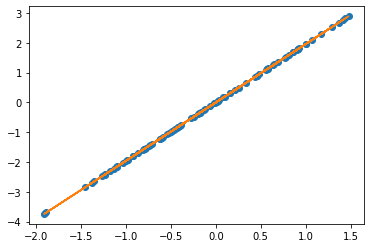

In [57]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

# generate regression dataset
inputs, outputs = datasets.make_regression(n_features=1, noise=0.0)

# reshape the x values from 2D array to 1D array
input_x = np.concatenate(inputs, axis = 0)

# get gradient and coefficients
m, b = np.polyfit(input_x, outputs, 1)

# scatter plot
plt.plot(input_x, outputs, 'o')


# plot regression line
plt.plot(input_x, np.array(input_x) *m + b)



#### Add some noise to the regression

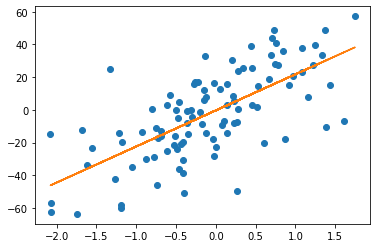

In [58]:
# generate regression dataset
inputs, outputs = datasets.make_regression(n_features=1, noise=20.0)

# reshape the x values from 2D array to 1D array
input_x = np.concatenate(inputs, axis = 0)

# get gradient and coefficients
m, b = np.polyfit(input_x, outputs, 1)

# scatter plot
plt.plot(input_x, outputs, 'o')


# plot regression line
plt.plot(input_x, np.array(input_x) *m + b)


#### Generate data points for clustering

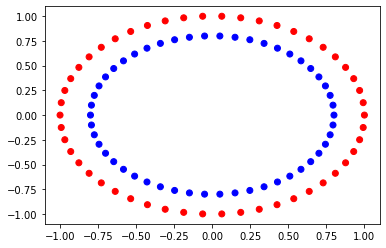

In [59]:
# generate circles dataset
data, labels = datasets.make_circles()

# split axis
x, y = zip(*data)

# define color map for labels
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'b'}

# 
label_color = [LABEL_COLOR_MAP[l] for l in list(labels)]


plt.scatter(x, y, c=label_color)

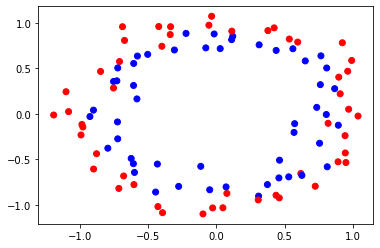

In [60]:
data, labels = datasets.make_circles(noise=0.09)

x, y = zip(*data)

LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'b'}


label_color = [LABEL_COLOR_MAP[l] for l in list(labels)]


plt.scatter(x, y, c=label_color)

#### Generate pandas dataframe of customer (categorical/attribute) data

- Note 1: when doing package installation, do downgrade faker package `pip install Faker==2.0.5` if not you will get an error as described in https://github.com/tirthajyoti/pydbgen/issues/16
- Note 2: if you encounter `SSL: CERTIFICATE_VERIFY_FAILED error` do follow instructions here to fix 

`If you're using macOS go to Macintosh HD > Applications > Python3.6 folder (or whatever version of python you're using) > double click on "Install Certificates.command" file.`

In [61]:
import pydbgen
# https://github.com/tirthajyoti/pydbgen
from pydbgen import pydbgen
myDB=pydbgen.pydb()

synth_df = myDB.gen_dataframe(100,['ssn','name','city','phone','date', 'zipcode', 'job_title'])

synth_df.head()

,ssn,name,city,phone-number,date,zipcode,job_title
0,029-71-1293,Miranda Webster,Rondout,689-781-5228,2020-02-09,22740,Farm manager
1,717-78-9846,Jonathan Moon,Hillister,251-272-7691,1981-06-11,93249,Community development worker
2,886-92-3818,Anna Gay,Beauregard,299-247-4828,1989-11-08,89570,Medical secretary
3,186-33-2411,Joseph Campbell,Rosebush,941-313-8036,2016-08-15,08071,Tree surgeon
4,242-43-9836,David Patterson,Collinston,371-872-2756,1982-05-21,41968,Waste management officer


## Homomorphic Encryption

<img src="Homomorphic_encryption.png" alt="Drawing" style="width: 300px; float:left"/>

Fully homomorphic encryption is where any function applied on the ciphertext when decrypted would give the same results as the function applied on the plaintext value.

Where only a few types of functions are supported, the type of encryption is called partially homomorphic encryption.

In this example we explore the partially homomorphic encryption cryptosystem called paillier.

In [62]:
from phe import paillier
import pprint
import numpy as np

pp = pprint.PrettyPrinter(indent=4)

# generate key pair for encryption and decryption
public_key, private_key = paillier.generate_paillier_keypair()

# perform encryption
secret_number_list = [3.141592653, 300, -4.6e-12]
encrypted_number_list = [public_key.encrypt(x) for x in secret_number_list]

# perform functions
encrypted_number_list_multiply = [x * 5 for x in encrypted_number_list] 
encrypted_number_list_addition = [x + 5 for x in encrypted_number_list]
encrypted_number_list_mean = np.mean(encrypted_number_list)


# show results
print('Original data:\n {}'.format(secret_number_list))




Original data:
 [3.141592653, 300, -4.6e-12]


In [63]:
print('\nMultiplication example (x * 5):')
pp.pprint(encrypted_number_list_multiply)
print('\ndecrypts to ')
pp.pprint([private_key.decrypt(x) for x in encrypted_number_list_multiply])



Multiplication example (x * 5):
[   <phe.paillier.EncryptedNumber object at 0x7f91d774ddc0>,

decrypts to 
[15.707963265, 1500, -2.2999999999999998e-11]


In [64]:
print('\nAddition example (x + 5):')
pp.pprint(encrypted_number_list_addition)
print('\ndecrypts to ')
pp.pprint([private_key.decrypt(x) for x in encrypted_number_list_addition])





Addition example (x + 5):
[   <phe.paillier.EncryptedNumber object at 0x7f91d7979070>,

decrypts to 
[8.141592653, 305, 4.9999999999954]


In [65]:
print('\nMean example:\n{}\n\ndecrypts to\n{}'.format(
    encrypted_number_list_mean, 
    private_key.decrypt(encrypted_number_list_mean)))


Mean example:

decrypts to
101.04719755099846
